In [2]:
import os
import pandas as pd 
import math
import numpy as np 
import matplotlib.pyplot as plt
import random as r 
import glob
import seaborn as sns
sns.set()
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
batchNum = 6
simfilepath = "/nBodyData/brutusSim/batch_brutus{0}*".format(batchNum)
alf = [i for i in glob.glob(simfilepath)]
if len(alf) < 1: print("Error: could not find sim files")
sdf = pd.concat([pd.read_csv(f,index_col=False) for f in alf],sort=False)

prediction = False
nnfile = "/nBodyData/pred/predicted_paths_batch_3_1.csv"
dataCols = ["x1tEnd_j", "x2tEnd_j", "x3tEnd_j", "y1tEnd_j", "y2tEnd_j", "y3tEnd_j","eventID"]
pdf = sdf


if prediction:
    pdf = pd.read_csv(nnfile, names=dataCols)

# combine dataframes
pdf.eventID = pdf.eventID.astype(int)
pdf.sort_values(["eventID"], axis=0, ascending=True, inplace= True) 
df = pdf
if prediction:
    adf = pd.merge(left=sdf,right=pdf, on='eventID')
    df = adf.drop_duplicates(subset='eventID')
    
r.seed(1)
indexArray = np.array(sdf['eventID'])
indexArray = np.unique((indexArray/10000).astype(int))

In [4]:
###### ENERGY
sdf['iKE'] =  0.5*(sdf['m1']*(sdf['dx1']**2 + sdf['dy1']**2) + sdf['m2']*(sdf['dx2']**2 + sdf['dy2']**2) + sdf['m3']*(sdf['dx3']**2 + sdf['dy3']**2))
sdf['iPE'] = -(2*(sdf['m1']*sdf['m3'])/((((sdf['x1']-sdf['x3'])**2)+ ((sdf['y1']-sdf['y3'])**2))**0.5)) - (2*(sdf['m2']*sdf['m3'])/((((sdf['x2']-sdf['x3'])**2)+ ((sdf['y2']-sdf['y3'])**2))**0.5)) - (2*(sdf['m1']*sdf['m2'])/((((sdf['x1']-sdf['x2'])**2)+ ((sdf['y1']-sdf['y2'])**2))**0.5))
sdf['iEnergy'] = sdf['iKE'] + sdf['iPE']
sdf['energy']  = 0.5*(sdf['m1']*(sdf['dx1tEnd']**2 + sdf['dy1tEnd']**2) + sdf['m2']*(sdf['dx2tEnd']**2 + sdf['dy2tEnd']**2) + sdf['m3']*(sdf['dx3tEnd']**2 + sdf['dy3tEnd']**2))+(-(2*(sdf['m1']*sdf['m3'])/((((sdf['x1tEnd']-sdf['x3tEnd'])**2)+ ((sdf['y1tEnd']-sdf['y3tEnd'])**2))**0.5)) - (2*(sdf['m2']*sdf['m3'])/((((sdf['x2tEnd']-sdf['x3tEnd'])**2)+ ((sdf['y2tEnd']-sdf['y3tEnd'])**2))**0.5)) - (2*(sdf['m1']*sdf['m2'])/((((sdf['x1tEnd']-sdf['x2tEnd'])**2)+ ((sdf['y1tEnd']-sdf['y2tEnd'])**2))**0.5)))
sdf['delEnergy'] = np.abs(sdf['energy']-sdf['iEnergy'])

sdf['absDist12'] = np.abs(sdf['x1tEnd']-sdf['x2tEnd'])
sdf['absDist13'] = np.abs(sdf['x1tEnd']-sdf['x3tEnd'])
sdf['absDist32'] = np.abs(sdf['x3tEnd']-sdf['x2tEnd'])

###### BARYCENTER
sdf['ibaryX'] = (sdf['m1']*sdf['x1']+sdf['m2']*sdf['x2']+sdf['m3']*sdf['x3'])/(sdf['m1']+sdf['m2']+sdf['m3'])
sdf['ibaryY'] = (sdf['m1']*sdf['y1']+sdf['m2']*sdf['y2']+sdf['m3']*sdf['y3'])/(sdf['m1']+sdf['m2']+sdf['m3'])
sdf['baryX'] = (sdf['m1']*sdf['x1tEnd']+sdf['m2']*sdf['x2tEnd']+sdf['m3']*sdf['x3tEnd'])/(sdf['m1']+sdf['m2']+sdf['m3'])
sdf['baryY'] = (sdf['m1']*sdf['y1tEnd']+sdf['m2']*sdf['y2tEnd']+sdf['m3']*sdf['y3tEnd'])/(sdf['m1']+sdf['m2']+sdf['m3'])
sdf['baryDiffX'] = np.abs(sdf['baryX']-sdf['ibaryX'])
sdf['baryDiffY'] = np.abs(sdf['baryY']-sdf['ibaryY'])

###### ANGULAR MOMENTUM (I DID THIS WRONG HAVE NOT FIXED YET)
# sdf['iL'] = 0
# sdf['r1'] = ((sdf['x1tEnd']**2 +sdf['y1tEnd']**2)**0.5)
# sdf['r2'] = ((sdf['x2tEnd']**2 +sdf['y2tEnd']**2)**0.5)
# sdf['r3'] = ((sdf['x3tEnd']**2 +sdf['y3tEnd']**2)**0.5)
# sdf['L1'] = sdf['m1']*sdf['r1']*((sdf['dx1tEnd']**2 + sdf['dy1tEnd']**2)**0.5)*(sdf['y1tEnd']/sdf['r1'])
# sdf['L2'] = sdf['m2']*sdf['r2']*((sdf['dx2tEnd']**2 + sdf['dy2tEnd']**2)**0.5)*(sdf['y2tEnd']/sdf['r2'])
# sdf['L3'] = sdf['m3']*sdf['r3']*((sdf['dx3tEnd']**2 + sdf['dy3tEnd']**2)**0.5)*(sdf['y3tEnd']/sdf['r3'])
# sdf['L'] = sdf['L1']+sdf['L2']+sdf['L3']

###### MOMENTUM
sdf['p1x'] = sdf['m1']*sdf['dx1tEnd']
sdf['p1y'] = sdf['m1']*sdf['dy1tEnd']
sdf['p2x'] = sdf['m2']*sdf['dx2tEnd']
sdf['p2y'] = sdf['m2']*sdf['dy2tEnd']
sdf['p3x'] = sdf['m3']*sdf['dx3tEnd']
sdf['p3y'] = sdf['m3']*sdf['dy3tEnd']
sdf['px'] = sdf['p1x'] + sdf['p2x'] + sdf['p3x']
sdf['py'] = sdf['p1y'] + sdf['p2y'] + sdf['p3y']
sdf['iPx'] = (sdf['m1']*sdf['dx1']) + (sdf['m2']*sdf['dx2']) + (sdf['m3']*sdf['dx3'])
sdf['iPy'] = (sdf['m1']*sdf['dy1']) + (sdf['m2']*sdf['dy2']) + (sdf['m3']*sdf['dy3'])
sdf['diffPx'] = sdf['px']-sdf['iPx']
sdf['diffPy'] = sdf['py']-sdf['iPy']

110000


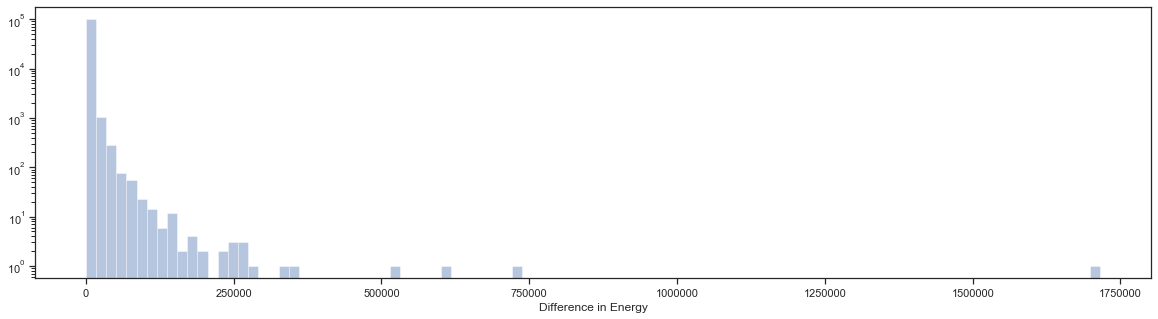

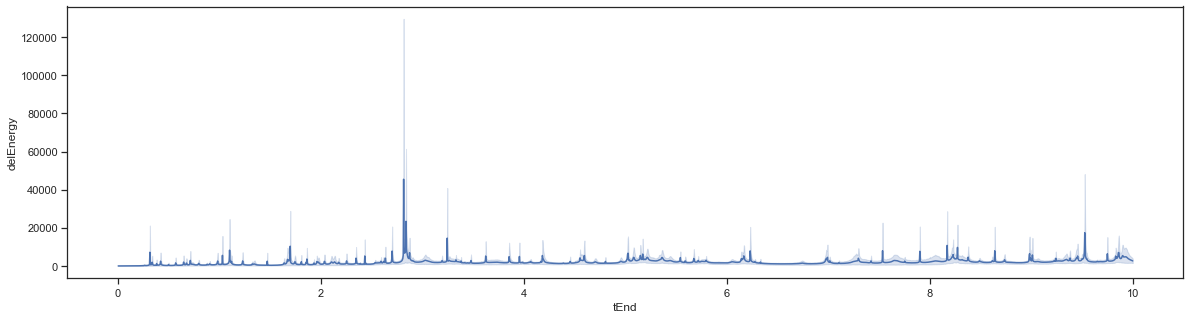

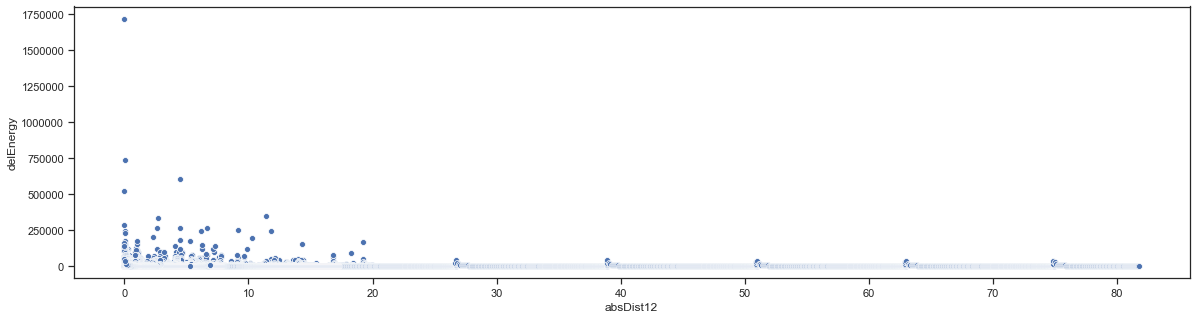

In [5]:
######################## ENERGY PLOT
index = np.random.choice(indexArray)*10000
print(index)
edf = sdf.loc[(sdf['eventID'] >= index) & (sdf['eventID'] <= (index+2560))]
# plot all events (sdf) or only 1 (edf)
edf = sdf

plt.rcParams["figure.figsize"] = (20, 5)
sns.despine()
sns.set_style("white")
sns.set_style("ticks")
ax = sns.distplot(np.abs(edf["delEnergy"]), kde=False, bins=100)
ax.set(xlabel="Difference in Energy", yscale="log")
plt.show()

ax2 = sns.lineplot(x="tEnd", y="delEnergy", data=edf)
plt.show()

ax3 = sns.scatterplot(x="absDist12", y="delEnergy", data=edf)

340000


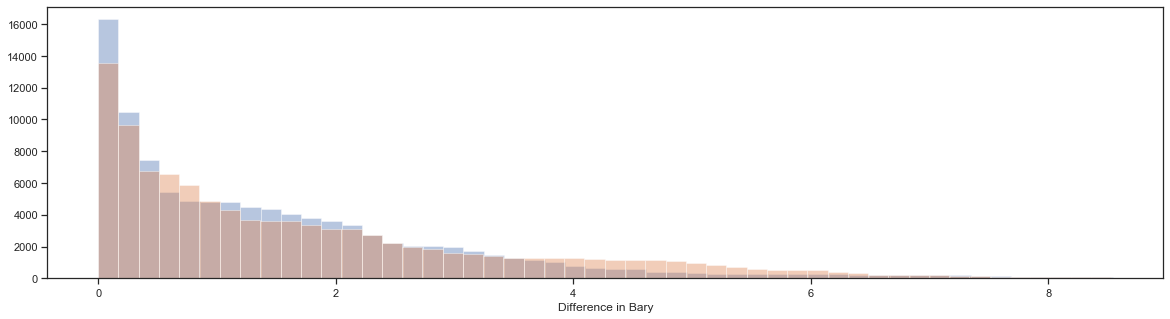

In [112]:
######################## BARY PLOT
index = np.random.choice(indexArray)*10000
print(index)
edf = sdf.loc[(sdf['eventID'] >= index) & (sdf['eventID'] <= (index+2560))]
# plot all events (sdf) or only 1 (edf)
edf = sdf

plt.rcParams["figure.figsize"] = (20, 5)
sns.despine()
sns.set_style("white")
sns.set_style("ticks")
ax = sns.distplot(edf["baryDiffY"], kde=False)
ax2 = sns.distplot(edf["baryDiffX"], kde=False)
ax.set(xlabel="Difference in Bary")
plt.show()

370000


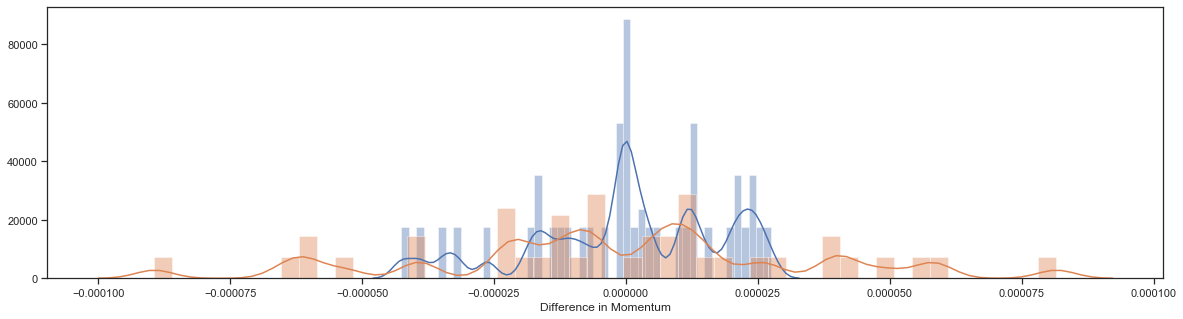

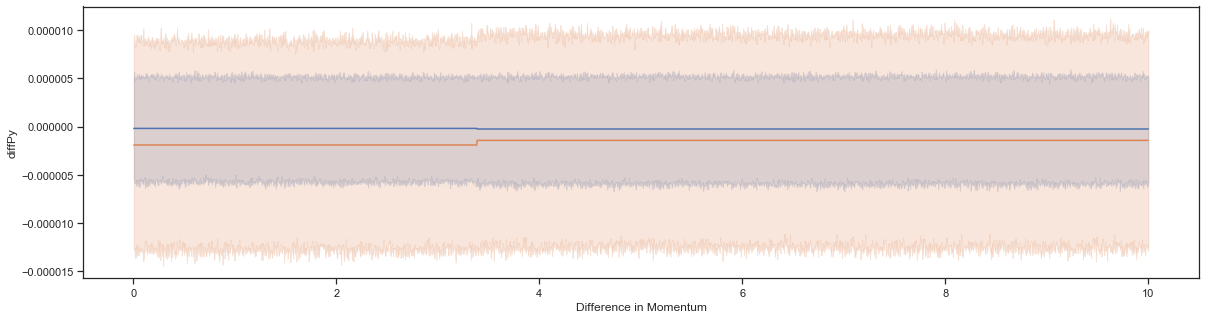

In [113]:
######################## MOMENTUM PLOT
index = np.random.choice(indexArray)*10000
print(index)
edf = sdf.loc[(sdf['eventID'] >= index) & (sdf['eventID'] <= (index+2560))]
# plot all events (sdf) or only 1 (edf)
edf = sdf

plt.rcParams["figure.figsize"] = (20, 5)
sns.despine()
sns.set_style("white")
sns.set_style("ticks")

ax = sns.distplot(edf["diffPx"])
ax2 = sns.distplot(edf["diffPy"])
ax.set(xlabel="Difference in Momentum")
plt.show()

ax = sns.lineplot(x="tEnd", y="diffPx", data=edf)
ax2 = sns.lineplot(x="tEnd", y="diffPy", data=edf)
ax.set(xlabel="Difference in Momentum")
plt.show()


In [ ]:
########## MEAN SQUARED ERROR (IN COORDINATES) WONT WORK W/O NN DF
df["delta_solns"] = np.sqrt(((df['x1tEnd'] - df['x1tEnd_j'])**2) + ((df['x2tEnd'] - df['x2tEnd_j'])**2) + ((df['x3tEnd'] - df['x3tEnd_j'])**2) +((df['y1tEnd'] - df['y1tEnd_j'])**2) +((df['y2tEnd'] - df['y2tEnd_j'])**2) + ((df['y3tEnd'] - df['y3tEnd_j'])**2))
amse_x1 = []
amse_x2 = []
amse_x3 = []
amse_y1 = []
amse_y2 = []
amse_y3 = []

times = np.linspace(0, 10, num=2561)
for i,t in enumerate(times):
    df_t = df.loc[df['tEnd'] == times[i]]
    for j in range(1,4):
        df_t["mse_x{0}".format(j)] = np.sqrt((df_t['x{0}tEnd'.format(j)] - df_t['x{0}tEnd_j'.format(j)])**2)
        df_t["mse_y{0}".format(j)] = np.sqrt((df_t['y{0}tEnd'.format(j)] - df_t['y{0}tEnd_j'.format(j)])**2)
    
    amse_x1.append(df_t["mse_x1"].mean(axis=0))
    amse_x2.append(df_t["mse_x2"].mean(axis=0))
    amse_x3.append(df_t["mse_x3"].mean(axis=0))
    amse_y1.append(df_t["mse_y1"].mean(axis=0))
    amse_y2.append(df_t["mse_y2"].mean(axis=0))
    amse_y3.append(df_t["mse_y3"].mean(axis=0))

In [ ]:
########### PLOT MEAN SQUARED ERROR 
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (20, 10)
ax.plot(times, amse_x1, label="x1")
ax.plot(times, amse_x2, label="x2")
ax.plot(times, amse_x3, label="x3")
ax.plot(times, amse_y1, label="y1")
ax.plot(times, amse_y2, label="y2")
ax.plot(times, amse_y3, label="y3")
ax.legend(loc='best', ncol=2, fancybox=True)

# ax.plot(df['tEnd'], df['delta_solns'])
ax.set_yscale('log')
# ax.set_xscale('log')
# ax.set_ylim(4*10e-3, 1)